Menginstall kaggle

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Memasukkan token API kaggle ke dalam google colab

In [ ]:
from google.colab import files

uploaded = files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Mendownload dataset yang dibutuhkan

In [ ]:
!kaggle datasets download -d hamzamanssor/car-damage-assessment

 44% 7.00M/16.0M [00:00<00:00, 72.4MB/s]
100% 16.0M/16.0M [00:00<00:00, 85.7MB/s]


Melakukan unzip pada dataset.

In [ ]:
!unzip car-damage-assessment.zip

Archive:  car-damage-assessment.zip
  inflating: data.csv                
  inflating: image/0.jpeg            
  inflating: image/1.jpeg            
  inflating: image/10.jpeg           
  inflating: image/100.jpeg          
  inflating: image/1000.jpeg         
  inflating: image/1001.jpeg         
  inflating: image/1002.jpeg         
  inflating: image/1003.jpeg         
  inflating: image/1004.jpeg         
  inflating: image/1005.jpeg         
  inflating: image/1006.jpeg         
  inflating: image/1007.jpeg         
  inflating: image/1008.jpeg         
  inflating: image/1009.jpeg         
  inflating: image/101.jpeg          
  inflating: image/1010.jpeg         
  inflating: image/1011.jpeg         
  inflating: image/1012.jpeg         
  inflating: image/1013.jpeg         
  inflating: image/1014.jpeg         
  inflating: image/1015.jpeg         
  inflating: image/1016.jpeg         
  inflating: image/1017.jpeg         
  inflating: image/1018.jpeg         
  inflating: i

import library yang dibutuhkan

In [ ]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

melihat data pada dataset.

In [ ]:
data = pd.read_csv('/content/data.csv')
data.head()

,Unnamed: 0,image,classes
0,0,image/0.jpeg,unknown
1,1,image/1.jpeg,lampu_depan
2,2,image/2.jpeg,pintu_lecet
3,3,image/3.jpeg,lampu_depan
4,4,image/4.jpeg,unknown


mengapus kolom Unnamed

In [ ]:
#Menghapus unnamed 0
data.drop(['Unnamed: 0'], axis = 1, inplace=True)

menampilkan info data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    1594 non-null   object
 1   classes  1594 non-null   object
dtypes: object(2)
memory usage: 25.0+ KB


In [ ]:
data.head()

,image,classes
0,image/0.jpeg,unknown
1,image/1.jpeg,lampu_depan
2,image/2.jpeg,pintu_lecet
3,image/3.jpeg,lampu_depan
4,image/4.jpeg,unknown


mengecek apakah ada nullity pada data

In [ ]:
data.isnull().sum()

image      0
classes    0
dtype: int64

grafik jumlah data per class

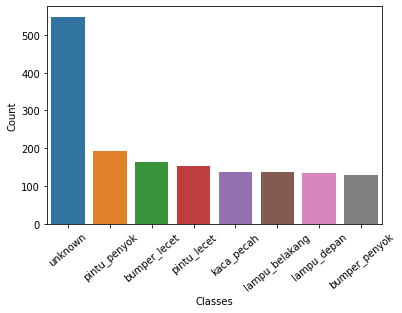

In [ ]:
counts = data['classes'].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=40);


In [ ]:
train_df, test_df = train_test_split(data, test_size=0.2)

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

Melakukan augmentasi pada data.

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='classes',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    seed=0
)

val_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='classes',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    seed=0
)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image',
    y_col='classes',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1275 validated image filenames belonging to 8 classes.
Found 1275 validated image filenames belonging to 8 classes.
Found 319 validated image filenames belonging to 8 classes.


In [ ]:
pretrained_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
inputs = pretrained_model.input
x = Dense(120, activation='relu')(pretrained_model.output)
x = Dense(120, activation='relu')(x)
outputs = Dense(8, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [ ]:
history = model.fit(train_gen, validation_data=val_gen, epochs=4, callbacks=my_callbacks)

Epoch 1/4
40/40 [==============================] - 137s 3s/step - loss: 0.1394 - accuracy: 0.9678 - val_loss: 0.0836 - val_accuracy: 0.9851
Epoch 2/4
40/40 [==============================] - 137s 3s/step - loss: 0.0779 - accuracy: 0.9859 - val_loss: 0.0414 - val_accuracy: 0.9984
Epoch 3/4
40/40 [==============================] - 138s 3s/step - loss: 0.0396 - accuracy: 0.9969 - val_loss: 0.0268 - val_accuracy: 1.0000
Epoch 4/4
40/40 [==============================] - 106s 3s/step - loss: 0.0266 - accuracy: 0.9992 - val_loss: 0.0179 - val_accuracy: 1.0000


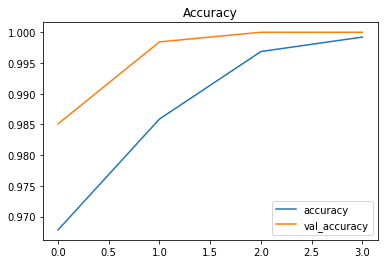

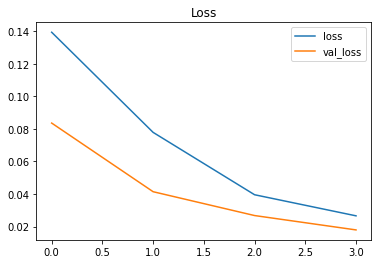

In [ ]:
# Membuat plot Accuracy dan val_accuracy
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

# membuat plot loss dan val_loss
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Menghitung Test Accuracy dan Loss
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.62142
Test Accuracy: 81.50%


In [ ]:
pred = model.predict(test_gen )
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

10/10 [==============================] - 15s 1s/step


In [ ]:
# Classification report
y_test = list(test_df.classes)
print(classification_report(y_test, pred))

                precision    recall  f1-score   support

  bumper_lecet       0.90      0.88      0.89        32
 bumper_penyok       0.65      0.68      0.67        25
    kaca_pecah       0.81      0.92      0.86        24
lampu_belakang       0.65      0.76      0.70        17
   lampu_depan       0.73      0.64      0.68        25
   pintu_lecet       0.68      0.82      0.74        28
  pintu_penyok       0.75      0.61      0.67        44
       unknown       0.93      0.92      0.92       124

      accuracy                           0.82       319
     macro avg       0.76      0.78      0.77       319
  weighted avg       0.82      0.82      0.81       319



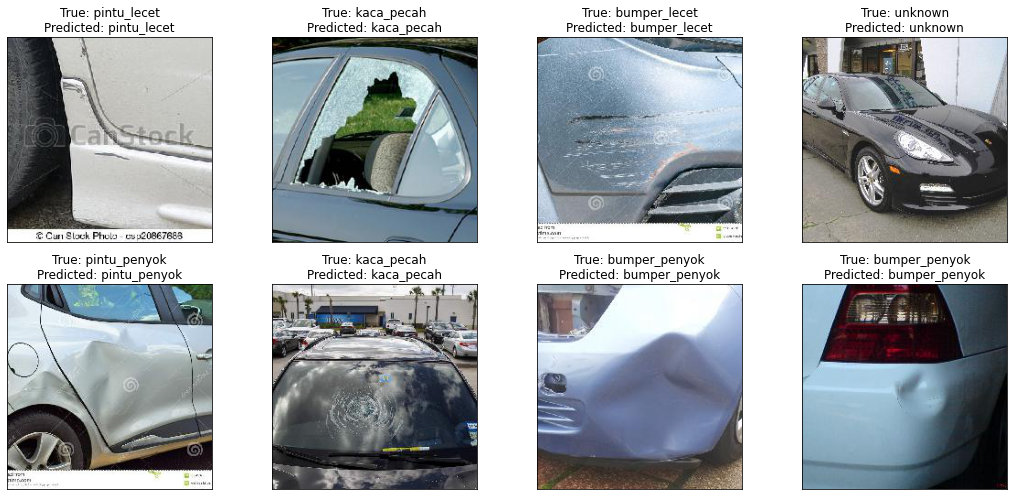

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.image.iloc[i]))
    ax.set_title(f"True: {test_df.classes.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()